<a href="https://colab.research.google.com/github/cobase2010/Online_Learning/blob/main/Machine_learning_sentdex_8_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9501373868421917


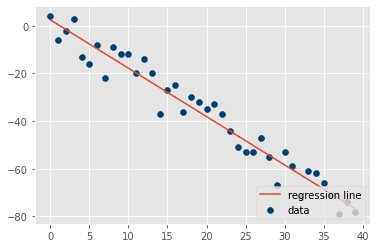

In [21]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# xs = np.array([1,2,3,4,5], dtype=np.float64)
# ys = np.array([5,4,6,5,6], dtype=np.float64)

def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)


def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
    

# xs, ys = create_dataset(40,40,2,correlation='pos')
# xs, ys = create_dataset(40,10,2,correlation='pos')
xs, ys = create_dataset(40,10,2,correlation='neg')
# xs, ys = create_dataset(40,10,2,correlation=False)
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

-0.8852720450281424


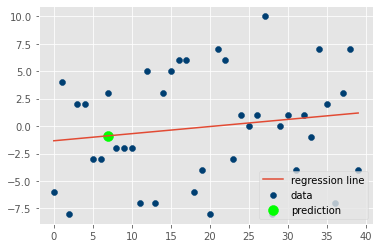

In [20]:
predict_x = 7
predict_y = (m*predict_x)+b
print(predict_y)

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.scatter(predict_x, predict_y, s=100, color='#00ff00', label='prediction')
plt.legend(loc=4)
plt.show()